# Submission Pertama: Menyelesaikan Permasalahan Human Resources

- Nama: Kurniati Laeli Munifah
- Email: k.laelimunifah@gmail.com
- Id Dicoding: klmunifah

## Persiapan


### Menyiapkan library yang dibutuhkan

Beberapa library yang dibutuhkan dalam keseluruhan proyek ini dimasukkan dengan menjalankan baris berikut.

In [1094]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install squarify
!pip install category_encoders
!pip install joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
import squarify
from category_encoders import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score , accuracy_score , confusion_matrix
import joblib

Found existing installation: scikit-learn 1.5.0
Uninstalling scikit-learn-1.5.0:
  Successfully uninstalled scikit-learn-1.5.0
  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


### Menyiapkan data yang akan digunakan

Sumber data merupakan data pegawai Jaya-Jaya Maju yang berasal dari link: https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv.

Secara keseluruhan data ini memiliki 35 kolom yang kemudian di simpan dalam dataframe employee_df.

In [1095]:
employee_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv",
                          encoding="windows-1252")
employee_df.head(10)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,1,...,4,80,0,1,3,3,1,0,0,0
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4
8,9,36,0.0,Travel_Frequently,635,Research & Development,18,1,Medical,1,...,1,80,0,8,2,3,8,1,1,7
9,10,32,0.0,Travel_Rarely,1018,Research & Development,3,2,Life Sciences,1,...,4,80,0,10,6,3,7,7,7,7


## Data Understanding

Untuk memahami data dilakukan beberapa pengecekan seperti pengecekan ukuran data dengan menggunakan shape() dan mengecek tipe data dan missing value dengan info(). Dapat dilihat employee_df memiliki ukuran 1470 baris dengan 35 kolom. Serta terdapat missing value pada kolom Attrition.  

In [1096]:
# mengecek ukuran data
employee_df.shape

(1470, 35)

In [1097]:
# Mengecek tipe data dan missing value
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

## Data Preparation / Preprocessing

Selanjutnya dilakukan proses penyiapan data. Pada kolom Attrition terdapat 412 data yang hilang atau NaN, setelah melihat employee_df terdapat 42 baris NaN pada kolom Attrition, sehingga baris tersebut dihapus dari employee_df.

In [1098]:
# menghitung missing value
missing_value_counts = employee_df.isnull().sum()
missing_value_counts

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [1099]:
# menghapus baris dengan missing values
employee_df= employee_df.dropna()
employee_df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,1,...,1,80,0,10,2,2,10,7,1,9
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


In [1100]:
# mengecek tipe data dan jumlah baris
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   object 
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non-null   int64  
 14  JobLevel     

In [1101]:
employee_df.nunique()

EmployeeId                  1058
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    731
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                991
MonthlyRate                 1038
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Menambah kolom yang mengubah beberapa data numerical menjadi categorical seperti
- Status dari Attrition : 0-Active , 1-Inactive
- Edutxt dari Education : 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
- Salary Category : Under 5000, 5000-9999, 10000-14999, dan Above 15000


In [1102]:
employee_df["Status"] = employee_df.Attrition.apply(lambda x: "Active" if x == 0 else "Inactive")
employee_df["Edutxt"] = employee_df.Education.apply(lambda x: "Below College" if x == 1
                                                      else ("College" if x == 2
                                                            else ("Bachelor" if x == 3
                                                                  else ("Master" if x == 4
                                                                        else "Doctor"))))
employee_df["SalaryCategory"] = employee_df["MonthlyIncome"].apply(lambda x: "Under 5000" if x < 5000
                                                      else ("5000-9999" if (x >= 5000 and x<9999)
                                                            else ("10000-14999" if (x >= 10000 and x<15000)
                                                                  else "Above 15000")))

Mengekstraksi kolom yang akan digunakan seperti EmployeeId, Attrition,Status, Age, Gender, Education, EducationField, Edutxt, JobLevel, Department,JobRole, BusinessTravel, MonthlyIncome, SalaryCategory, PercentSalaryHike,  TotalWorkingYears, MaritalStatus, PerformanceRating, JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction, dan WorkLifeBalance.

In [1103]:
employee_df = employee_df[["EmployeeId", "Attrition", "Status", "Age", "Gender", "Education",
                           "EducationField", "Edutxt", "JobLevel", "Department", "JobRole", "BusinessTravel",
                           "MonthlyIncome", "SalaryCategory", "PercentSalaryHike", "TotalWorkingYears", "OverTime", "MaritalStatus",  "PerformanceRating",
                           "JobSatisfaction", "EnvironmentSatisfaction", "RelationshipSatisfaction", "WorkLifeBalance"]]
employee_df

,EmployeeId,Attrition,Status,Age,Gender,Education,EducationField,Edutxt,JobLevel,Department,...,SalaryCategory,PercentSalaryHike,TotalWorkingYears,OverTime,MaritalStatus,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance
1,2,1.0,Inactive,37,Female,2,Medical,College,2,Research & Development,...,Under 5000,15,15,No,Married,3,2,1,1,1
2,3,1.0,Inactive,51,Male,4,Life Sciences,Master,1,Research & Development,...,Under 5000,12,18,Yes,Married,3,3,1,3,4
3,4,0.0,Active,42,Female,3,Marketing,Bachelor,4,Sales,...,10000-14999,14,23,No,Married,3,2,3,4,4
6,7,0.0,Active,40,Male,2,Medical,College,2,Sales,...,5000-9999,22,6,Yes,Married,4,4,2,3,2
7,8,1.0,Inactive,55,Male,3,Medical,Bachelor,5,Research & Development,...,Above 15000,13,24,Yes,Married,3,1,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,1.0,Inactive,28,Male,2,Technical Degree,College,3,Research & Development,...,5000-9999,12,10,No,Single,3,1,2,1,2
1465,1466,0.0,Active,38,Female,3,Life Sciences,Bachelor,3,Research & Development,...,5000-9999,14,10,Yes,Single,3,3,3,4,4
1467,1468,1.0,Inactive,28,Female,1,Life Sciences,Below College,1,Research & Development,...,Under 5000,11,1,Yes,Married,3,4,3,4,2
1468,1469,0.0,Active,40,Male,2,Life Sciences,College,1,Research & Development,...,Under 5000,16,6,No,Divorced,3,3,3,2,3


## EDA dan Visualisasi Data

Pada tahap ini dilakukan eksplorasi data dan visualisasi data untuk menjawab beberapa pertanyaan berikut.

### 1. Berapa jumlah keseluruhan pegawai di Perusahaan Jaya Jaya Maju?

Setelah menghapus data yang memiliki nilai NaN terdapat 1058 orang karyawan yang statusnya jelas pada employee_df.

In [1104]:
# Jumlah total karyawan tahun ini
employee_total = len(employee_df["EmployeeId"])
print("Jumlah karyawan tahun ini adalah " + str(employee_total) + " orang.")

Jumlah karyawan tahun ini adalah 1058 orang.


### 2. Bagaimana Perbandingan Jumlah karyawan aktif dan keluar?

Dengan menjalankan baris berikut, diketahui terdapat 179 orang karyawan yang tidak aktif dan 879 karyawan yang masih aktif.

In [1105]:
employee_status = employee_df.groupby(by = ["Status"] ).agg({"EmployeeId" : "count",
            }).sort_values(by = ["EmployeeId"], ascending = True)
employee_status = employee_status.reset_index()
employee_status = employee_status.rename(columns = {"EmployeeId":"Total"})
employee_status

,Status,Total
0,Inactive,179
1,Active,879


Berikut data perbandingan jika ditampilkan pada pie chart

([<matplotlib.patches.Wedge at 0x7901a7dfb2e0>,
 [Text(0.9482430538759041, 0.5575258835032678, 'Inactive'),
  Text(-0.9482430277762329, -0.5575259278937281, 'Active')],
 [Text(0.5172234839323113, 0.3041050273654188, '17%'),
  Text(-0.517223469696127, -0.3041050515783971, '83%')])

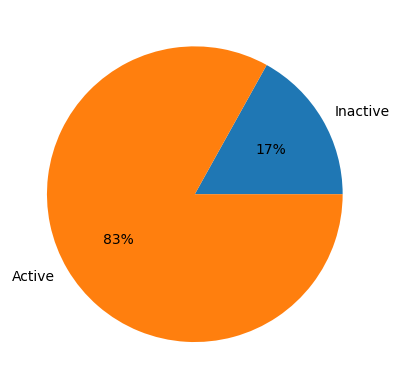

In [1106]:
plt.pie(employee_status["Total"], autopct="%.0f%%", labels = employee_status["Status"])

Selanjutnya dilakukan perhitungan Attrition Rate dari data karyawan sebagai berikut.

In [1107]:
Attrition_rate = 100* (179 / ((1058 + 879) / 2))
print("Attrition Rate sebesar " + str(round(Attrition_rate, 2)) + "%")

Attrition Rate sebesar 18.48%


### 3. Bagaimana sebaran umur karyawan?

Selanjutnya kita ingin melihat sebaran umur karyawan. Dengan menjalankan kode berikut dapat kita ketahui jumlah karyawan berdasarkan umurnya.

In [1108]:
employee_age= employee_df.groupby(by = ["Age"] ).agg({"EmployeeId" : "count",
            }).sort_values(by = ["Age"], ascending = True)
employee_age = employee_age.reset_index()
employee_age = employee_age.rename(columns = {"EmployeeId":"Total"})
employee_age

,Age,Total
0,18,6
1,19,9
2,20,9
3,21,10
4,22,12
5,23,7
6,24,17
7,25,22
8,26,30
9,27,36


In [1109]:
employee_age_status= employee_df.groupby(by = ["Age", "Status"] ).agg({"EmployeeId" : "count",
            }).sort_values(by = ["Age"], ascending = True)
employee_age_status = employee_age_status.reset_index()
employee_age_status = employee_age_status.rename(columns = {"EmployeeId":"Total"})
employee_age_status

,Age,Status,Total
0,18,Active,3
1,18,Inactive,3
2,19,Active,3
3,19,Inactive,6
4,20,Active,3
...,...,...,...
76,57,Active,4
77,58,Active,6
78,58,Inactive,5
79,59,Active,10


Text(0.5, 1.0, 'Employees by Age')

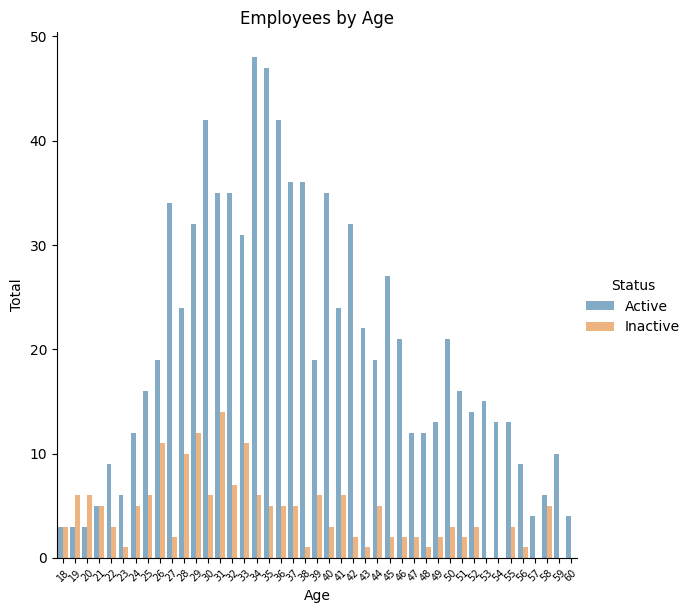

In [1110]:
sns.catplot(data=employee_age_status, kind="bar",
    x="Age", y="Total", hue="Status",
    errorbar="sd", alpha=.6, height=6)
plt.xticks(rotation=45, size = 7)
plt.title("Employees by Age")

Setelah melihat grafik sebaran umur, dapat kita simpulkan bahwa karyawan yang memutuskan untuk keluar (inactive) lebih banyak berasal dari kalangan umur 25-35 tahun.

### 3. Bagaimana perbandingan jumlah karyawan berdasarkan gender dan statusnya?

Selanjutnya dengan menjalankan kode berikut dapat kita ketahui sebaran gender karyawan.

In [1111]:
employee_gender_status = employee_df.groupby(by = ['Gender', 'Status'] ).agg({"EmployeeId" : "count",
            }).sort_values(by = ['Gender'], ascending = True)
employee_gender_status = employee_gender_status.reset_index()
employee_gender_status = employee_gender_status.rename(columns = {'EmployeeId':'Total'})
employee_gender_status

,Gender,Status,Total
0,Female,Active,367
1,Female,Inactive,71
2,Male,Active,512
3,Male,Inactive,108


In [1112]:
fig = px.sunburst(employee_gender_status, path=["Gender", "Status"], values="Total")
fig.show()

Dari grafik tersebut dapat kita simpulkan bahwa jumlah karyawan laki-laki lebih banyak dibandingkan perempuan, begitu juga jumlah karyawan laki laki yang memutuskan keluar (inactive) lebih banyak dibandingkan jumlah karyawan perempuan yang memutuskan keluar (inactive)

### 4. Bagaimana sebaran tingkatan pendidikan karyawan?


Selanjutnya dengan menjalankan kode berikut dapat kita ketahui sebaran tingkat pendidikan karyawan.

In [1113]:
employee_education_status = employee_df.groupby(by = ["Education", "Edutxt", "Status"] ).agg({"EmployeeId" : "count",
            }).sort_values(by = ["Education"], ascending = True)
employee_education_status = employee_education_status.reset_index()
employee_education_status = employee_education_status.rename(columns = {"EmployeeId":"Total"})
employee_education_status = employee_education_status.drop(columns = ["Education"])
employee_education_status

,Edutxt,Status,Total
0,Below College,Active,105
1,Below College,Inactive,26
2,College,Active,177
3,College,Inactive,31
4,Bachelor,Active,334
5,Bachelor,Inactive,76
6,Master,Active,232
7,Master,Inactive,44
8,Doctor,Active,31
9,Doctor,Inactive,2


Text(0.5, 1.0, 'Employees by Education Level')

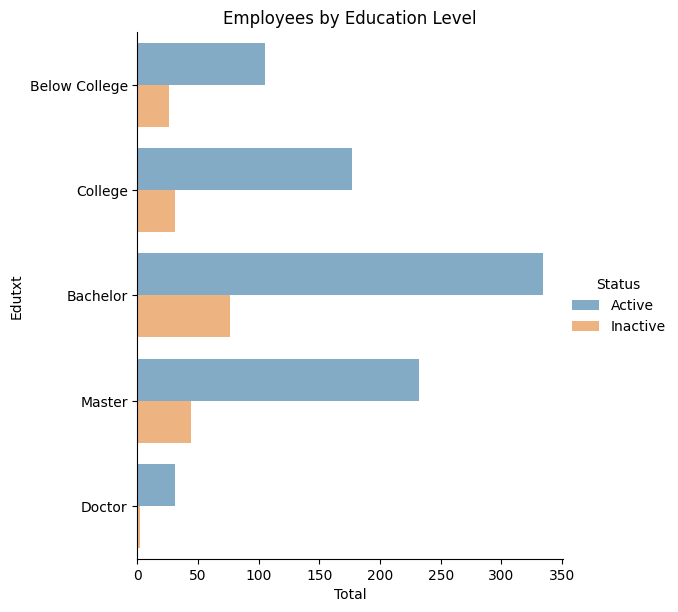

In [1114]:
sns.catplot(
    data=employee_education_status, kind="bar",
    y="Edutxt", x="Total", hue="Status", orient="h",
    errorbar="sd", alpha=.6, height=6)
plt.title("Employees by Education Level")

Dari grafik tersebut dapat kita simpulkan sebagian besar karyawan merupakan lulusan sarjana. Selain itu, karyawan yang memutuskan keluar juga paling banyak berasal dari lulusan sarjana.

### 7. Bagaimana sebaran bidang pendidikan yang ditempuh karyawan

Selanjutnya dengan menjalankan kode berikut dapat kita ketahui sebaran bidang pendidikan yang ditempuh karyawan.

In [1115]:
employee_edufield = employee_df.groupby(by = ["EducationField"] ).agg({"EmployeeId" : "count",
            }).sort_values(by = ["EmployeeId"], ascending = True)
employee_edufield = employee_edufield.reset_index()
employee_edufield = employee_edufield.rename(columns = {"EmployeeId":"Total"})
employee_edufield

,EducationField,Total
0,Human Resources,15
1,Other,59
2,Technical Degree,96
3,Marketing,122
4,Medical,330
5,Life Sciences,436


In [1116]:
employee_edufield_status = employee_df.groupby(by = ["EducationField","Status"] ).agg({"EmployeeId" : "count",
            }).sort_values(by = ["EducationField"], ascending = True)
employee_edufield_status = employee_edufield_status.reset_index()
employee_edufield_status = employee_edufield_status.rename(columns = {"EmployeeId":"Total"})
employee_edufield_status

,EducationField,Status,Total
0,Human Resources,Active,13
1,Human Resources,Inactive,2
2,Life Sciences,Active,366
3,Life Sciences,Inactive,70
4,Marketing,Active,96
5,Marketing,Inactive,26
6,Medical,Active,284
7,Medical,Inactive,46
8,Other,Active,49
9,Other,Inactive,10


(0.0, 100.0, 0.0, 100.0)

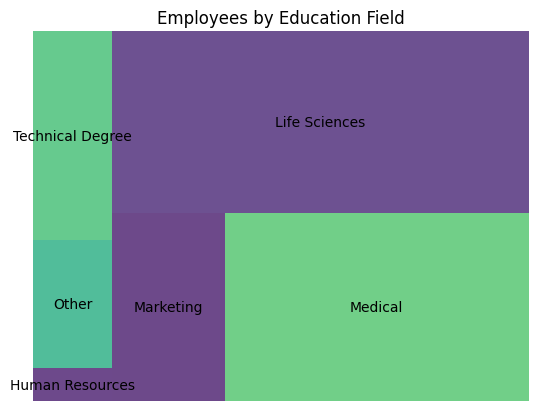

In [1117]:
squarify.plot(sizes=employee_edufield["Total"], label = employee_edufield["EducationField"],alpha=0.8)
plt.title("Employees by Education Field")
plt.axis("off")

Dari grafik tersebut dapat kita simpulkan sebagian besar karyawan merupakan menempuh pendidikan Life Sciences. Bidang pendikan life sciences juga menyumbang karyawan keluar paling banyak.

### 6. Bagaimana sebaran department karyawan?

Selanjutnya dengan menjalankan kode berikut dapat kita ketahui department asal karyawan.

In [1118]:
employee_department = employee_df.groupby(by = ["Department"] ).agg({"EmployeeId" : "count",
            }).sort_values(by = ["EmployeeId"], ascending = True)
employee_department = employee_department.reset_index()
employee_department = employee_department.rename(columns = {"EmployeeId":"Total"})
employee_department

,Department,Total
0,Human Resources,38
1,Sales,319
2,Research & Development,701


In [1119]:
employee_department_status = employee_df.groupby(by = ["Department","Status"] ).agg({"EmployeeId" : "count",
            }).sort_values(by = ["Department"], ascending = True)
employee_department_status = employee_department_status.reset_index()
employee_department_status = employee_department_status.rename(columns = {"EmployeeId":"Total"})
employee_department_status

,Department,Status,Total
0,Human Resources,Active,32
1,Human Resources,Inactive,6
2,Research & Development,Active,594
3,Research & Development,Inactive,107
4,Sales,Active,253
5,Sales,Inactive,66


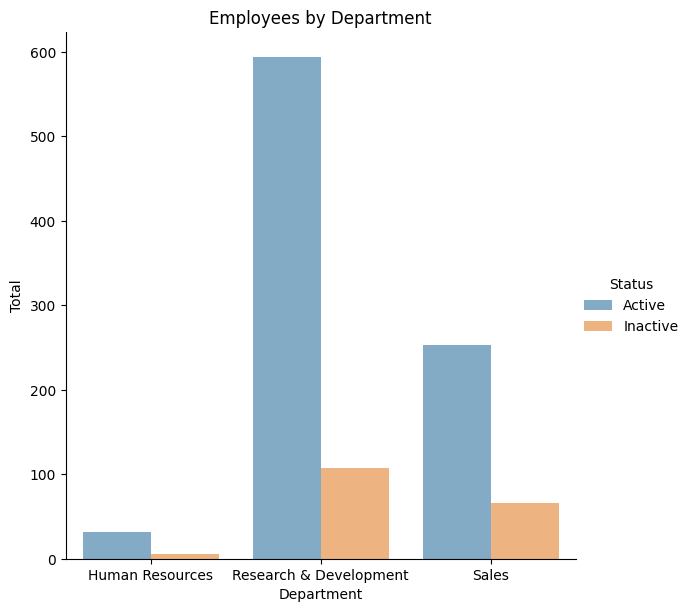

In [1120]:
sns.catplot(
    data=employee_department_status, kind="bar",
    x="Department", y="Total", hue="Status",
    errorbar="sd", alpha=.6, height=6)
plt.title("Employees by Department")
plt.show()

Dari grafik tersebut dapat kita simpulkan jumlah karyawan terbanyak berasal dari department Research & Development. Department ini juga menyumbang karyawan keluar terbanyak.

### 7. Bagaimana sebaran Jabatan Karyawan?

Selanjutnya dengan menjalankan kode berikut dapat kita ketahui jabatan karyawan.

In [1121]:
employee_jobrole = employee_df.groupby(by = ["JobRole"] ).agg({"EmployeeId" : "count",
            }).sort_values(by = ["EmployeeId"], ascending = True)
employee_jobrole = employee_jobrole.reset_index()
employee_jobrole = employee_jobrole.rename(columns = {"EmployeeId":"Total"})
employee_jobrole

,JobRole,Total
0,Human Resources,30
1,Sales Representative,58
2,Research Director,62
3,Manager,79
4,Healthcare Representative,88
5,Manufacturing Director,107
6,Laboratory Technician,188
7,Research Scientist,214
8,Sales Executive,232


In [1122]:
employee_jobrole_status = employee_df.groupby(by = ["JobRole","Status"] ).agg({"EmployeeId" : "count",
            }).sort_values(by = ["JobRole"], ascending = True)
employee_jobrole_status = employee_jobrole_status.reset_index()
employee_jobrole_status = employee_jobrole_status.rename(columns = {"EmployeeId":"Total"})
employee_jobrole_status

,JobRole,Status,Total
0,Healthcare Representative,Active,80
1,Healthcare Representative,Inactive,8
2,Human Resources,Active,24
3,Human Resources,Inactive,6
4,Laboratory Technician,Active,139
5,Laboratory Technician,Inactive,49
6,Manager,Active,74
7,Manager,Inactive,5
8,Manufacturing Director,Inactive,7
9,Manufacturing Director,Active,100


(0.0, 100.0, 0.0, 100.0)

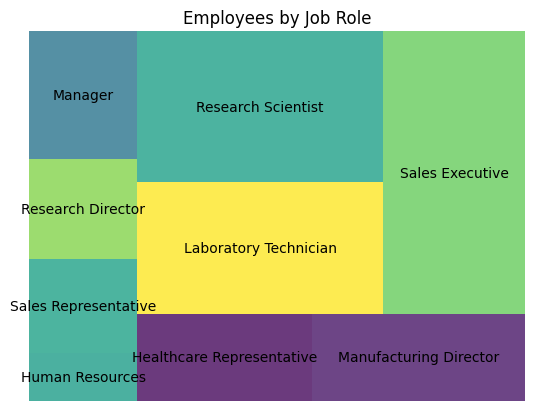

In [1123]:
squarify.plot(sizes=employee_jobrole["Total"], label = employee_jobrole["JobRole"],alpha=0.8)
plt.title("Employees by Job Role")
plt.axis("off")

Dari grafik tersebut dapat kita simpulkan jumlah karyawan terbanyak memiliki jabatan sebagai Sales Executive. Sedangkan jumlah karyawan yang keluar terbanyak berasal dari jabatan Laboratory Technician.

### 8. Bagaimana sebaran tingkat jabatan karyawan?


Selanjutnya dengan menjalankan kode berikut dapat kita ketahui level jabatan karyawan.

In [1124]:

employee_joblevel_status = employee_df.groupby(by = ["JobLevel", "Status"] ).agg({"EmployeeId" : "count"
            }).sort_values(by = ["JobLevel"], ascending = False)
employee_joblevel_status = employee_joblevel_status.reset_index()
employee_joblevel_status = employee_joblevel_status.rename(columns = {"EmployeeId":"Total"})
employee_joblevel_status

,JobLevel,Status,Total
0,5,Active,50
1,5,Inactive,5
2,4,Active,76
3,4,Inactive,4
4,3,Active,140
5,3,Inactive,25
6,2,Active,327
7,2,Inactive,37
8,1,Active,286
9,1,Inactive,108


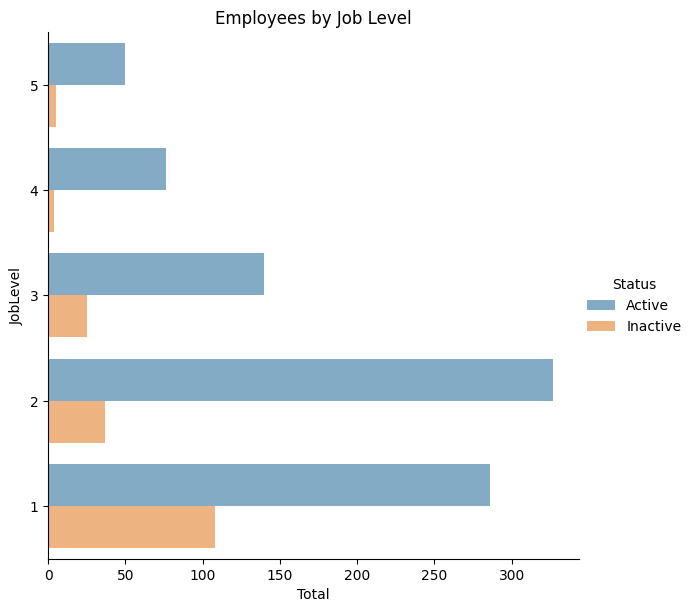

In [1125]:
sns.catplot(
    data=employee_joblevel_status, kind="bar",
    y="JobLevel", x="Total", hue="Status", orient ="h", order = employee_joblevel_status["JobLevel"],
    errorbar="sd", alpha=.6, height=6)
plt.title("Employees by Job Level")
plt.show()

Dari grafik dapat kita lihat bahwa semakin rendah level jabatan karyawan semakin banyak karyawan yang keluar.

### 9. Berapa banyak karyawan yang sering melakukan perjalanan bisnis?

Selanjutnya dengan menjalankan kode berikut dapat kita ketahui sebaran seberapa sering karyawan melakukan perjalanan bisnis.

In [1126]:
employee_businesstravel_status = employee_df.groupby(by = ["BusinessTravel","Status"] ).agg({"EmployeeId" : "count",
            }).sort_values(by = ["BusinessTravel"], ascending = True)
employee_businesstravel_status = employee_businesstravel_status.reset_index()
employee_businesstravel_status = employee_businesstravel_status.rename(columns = {"EmployeeId":"Total"})
employee_businesstravel_status

,BusinessTravel,Status,Total
0,Non-Travel,Active,96
1,Non-Travel,Inactive,11
2,Travel_Frequently,Active,154
3,Travel_Frequently,Inactive,51
4,Travel_Rarely,Active,629
5,Travel_Rarely,Inactive,117


In [1127]:
fig = px.sunburst(employee_businesstravel_status, path=["BusinessTravel", "Status"], values="Total")
fig.show()

Berdasarkan grafik tersebut, kebanyakan karyawan jarang melakukan perjalanan bisnis. Karyawan yang jarang melakukan perjalanan bisnis juga paling banyak keluar dari perusahaan.

### 10. Bagaimana status pernikahan karyawan?

Selanjutnya dengan menjalankan kode berikut dapat kita ketahui sebaran status pernikahan karyawan.

In [1128]:
employee_marital_status = employee_df.groupby(by = ["MaritalStatus", "Status"] ).agg({"EmployeeId" : "count",
            }).sort_values(by = ["MaritalStatus"], ascending = True)
employee_marital_status = employee_marital_status.reset_index()
employee_marital_status = employee_marital_status.rename(columns = {"EmployeeId":"Total"})
employee_marital_status

,MaritalStatus,Status,Total
0,Divorced,Active,219
1,Divorced,Inactive,23
2,Married,Active,402
3,Married,Inactive,62
4,Single,Active,258
5,Single,Inactive,94


In [1129]:
fig = px.sunburst(employee_marital_status, path=["MaritalStatus", "Status"], values="Total")
fig.show()

Berdasarkan grafik tersebut kebanyakan karyawan sudah menikah, namun karyawan yang masih single yang paling banyak keluar dari perusahaan.

### 11. Berapa rata-rata gaji perbulan dan  sebaran kategori penghasilan karyawan?

Selanjutnya dengan menjalankan kode berikut dapat kita ketahui sebaran gaji karyawan.

In [1130]:
employee_df[["MonthlyIncome", "TotalWorkingYears"]].describe()

,MonthlyIncome,TotalWorkingYears
count,1058.000000,1058.000000
mean,6625.945180,11.435728
std,4837.695042,8.016429
min,1009.000000,0.000000
25%,2900.250000,6.000000
50%,4903.500000,10.000000
75%,8736.500000,16.000000
max,19999.000000,40.000000


In [1131]:
employee_salarycategory_status = employee_df.groupby(by = ["SalaryCategory", "Status"] ).agg({"EmployeeId" : "count", "MonthlyIncome": "min"
            }).sort_values(by = ["MonthlyIncome"], ascending = False)
employee_salarycategory_status = employee_salarycategory_status.reset_index()
employee_salarycategory_status = employee_salarycategory_status.rename(columns = {"EmployeeId":"Total"})
employee_salarycategory_status = employee_salarycategory_status.drop(columns = ["MonthlyIncome"])
employee_salarycategory_status

,SalaryCategory,Status,Total
0,Above 15000,Inactive,5
1,Above 15000,Active,97
2,10000-14999,Active,102
3,10000-14999,Inactive,15
4,5000-9999,Inactive,35
5,5000-9999,Active,262
6,Under 5000,Active,418
7,Under 5000,Inactive,124


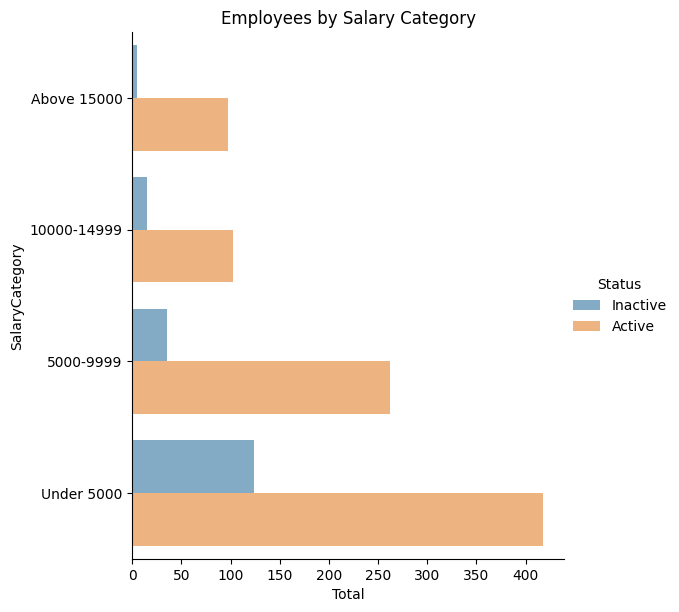

In [1132]:
sns.catplot(
    data=employee_salarycategory_status, kind="bar",
    y="SalaryCategory", x="Total", hue="Status", orient ="h",
    errorbar="sd", alpha=.6, height=6)
plt.title("Employees by Salary Category")
plt.show()

Berdasarkan hasil analisis data karyawan memiliki rata rata gaji 6625 USD, dan karyawan yang paling banyak keluar berasal dari golongan gaji di bawah 5000 USD.	Sehingga karyawan bergaji di bawah rata-rata cenderung lebih mudah memutuskan keluar.

### 12. Bagaimana sebaran persentase kenaikan gaji karyawan?


Selanjutnya dengan menjalankan kode berikut dapat kita ketahui sebaran kenaikan gaji karyawan.

In [1133]:
employee_salaryhike_status = employee_df.groupby(by = ["PercentSalaryHike", "Status"] ).agg({"EmployeeId" : "count"
            }).sort_values(by = ["PercentSalaryHike"], ascending = False)
employee_salaryhike_status = employee_salaryhike_status.reset_index()
employee_salaryhike_status = employee_salaryhike_status.rename(columns = {"EmployeeId":"Total"})
employee_salaryhike_status

,PercentSalaryHike,Status,Total
0,25,Inactive,1
1,25,Active,8
2,24,Inactive,4
3,24,Active,12
4,23,Inactive,3
5,23,Active,18
6,22,Inactive,11
7,22,Active,33
8,21,Inactive,3
9,21,Active,26


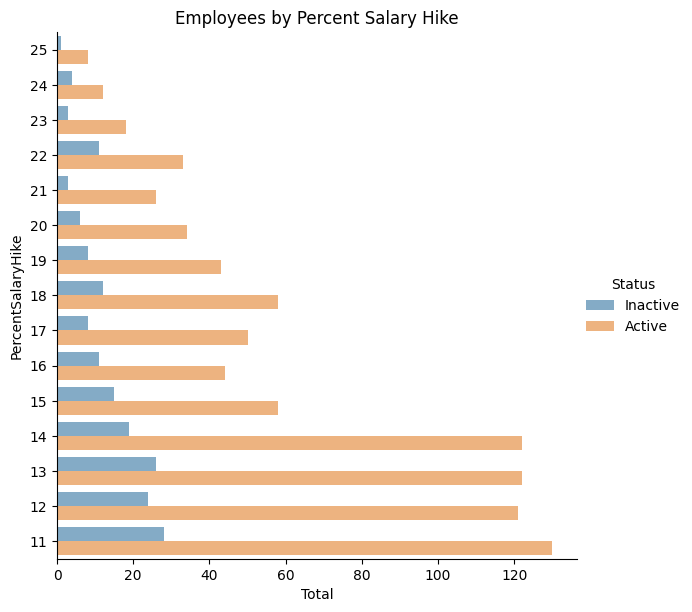

In [1134]:
sns.catplot(
    data=employee_salaryhike_status, kind="bar",
    y="PercentSalaryHike", x="Total", hue="Status", orient ="h", order = employee_salaryhike_status["PercentSalaryHike"],
    errorbar="sd", alpha=.6, height=6)
plt.title("Employees by Percent Salary Hike")
plt.show()

Dari grafik diatas kebanyakan karyawan mendapat peningkatan persentase kenaikan gaji yang rendah, karyawan dengan persentase peningkatan kenaikan gaji yang rendah jugalah yang cenderung memutuskan keluar.

### 13. Berapa rata-rata lama kerja karyawan di perusahaan?


In [1135]:
employee_df[["TotalWorkingYears"]].describe()

,TotalWorkingYears
count,1058.000000
mean,11.435728
std,8.016429
min,0.000000
25%,6.000000
50%,10.000000
75%,16.000000
max,40.000000


Rata-rata lama kerja karyawan di perusahaan tersebut adalah 11.4 tahun

### 14. Berapa banyak karyawan yang bekerja overtime?


Dengan menjalankan perintah berikut kita dapat mengetahui jumlah karyawan yang bekerja overtime

In [1136]:
employee_overtime_status = employee_df.groupby(by = ["OverTime", "Status"] ).agg({"EmployeeId" : "count",
            }).sort_values(by = ["OverTime"], ascending = True)
employee_overtime_status = employee_overtime_status.reset_index()
employee_overtime_status = employee_overtime_status.rename(columns = {"EmployeeId":"Total"})
employee_overtime_status

,OverTime,Status,Total
0,No,Active,670
1,No,Inactive,81
2,Yes,Active,209
3,Yes,Inactive,98


In [1137]:
fig = px.sunburst(employee_overtime_status, path=["OverTime", "Status"], values="Total")
fig.show()

Berdasarkan grafik tersebut kebanyakan karyawan tidak bekerja secara overtime. Akan tetapi, jumlah karyawan yang keluar paling banyak berasal dari karyawan yang bekerja overtime.

### 13. Bagaimana kualitas kerja karyawan dan tingkat kepuasan karyawan dari skala 1-5?

In [1138]:
employee_df[["PerformanceRating", "JobSatisfaction", "WorkLifeBalance", "EnvironmentSatisfaction", "RelationshipSatisfaction"]] = employee_df[["PerformanceRating", "JobSatisfaction", "WorkLifeBalance", "EnvironmentSatisfaction", "RelationshipSatisfaction"]].apply(lambda x : (x*1.25))
employee_df[["PerformanceRating", "JobSatisfaction", "WorkLifeBalance", "EnvironmentSatisfaction", "RelationshipSatisfaction"]].mean()

<ipython-input-1138-55c7583baef2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



PerformanceRating           3.937854
JobSatisfaction             3.436909
WorkLifeBalance             3.454631
EnvironmentSatisfaction     3.390832
RelationshipSatisfaction    3.408554
dtype: float64

Dapat kita lihat bahwa kualitas kerja karyawan dan tingkat kepuasan karyawan berada pada nilai 3,3 -3,9. Dengan kepuasan terhadap lingkungan kerja memiliki nilai paling rendah.

### Kesimpulan dan saran
1.   Kesimpulan
       *   Jumlah keseluruhan karyawan ada 1058 orang
       *   Terdapat sekitar 17% karyawan yang keluar dengan Attrition Rate sebesar 18.48%
       *   Kebanyakan karyawan yang keluar berada pada rentang umur 25-35 tahun
       *   Kebanyakan karyawan berjenis kelamin laki-laki dan kebanyakan karyawan yang keluar juga berjenis kelamin laki-laki.
       *   Kebanyakan karyawan lulusan sarjana dan kebanyakan karyawan yang keluar juga lulusan sarjana.
       *   Kebanyakan karyawan yang keluar berada pada rentang umur 25-35 tahun
       *   Kebanyakan karyawan menempuh pendidikan Life Sciences dan kebanyakan karyawan yang keluar juga menempuh pendidikan Life Sciences.
       *   Kebanyakan karyawan berasal dari department Research & Development dan kebanyakan karyawan yang keluar juga berasal dari department Research & Development.
       *   Kebanyakan karyawan memiliki jabatan Sales Executive sedangkan kebanyakan karyawan yang keluar memiliki jabatan Laboratory Technician.
       *   Semakin rendah level jabatan karyawan semakin banyak karyawan yang keluar.
       *    Kebanyakan karyawan jarang melakukan perjalanan bisnis dan kebanyakan karyawan yang keluar juga jarang melakukan perjalanan bisnis.
       *    Sebagian besar karyawan sudah menikan, namun karyawan yang single yang lebih banyak keluar.
       *    Kebanyakan karyawan memiliki gaji di bawah rata-rata. Semakin rendah gaji karyawan, semakin besar kecenderungan karyawan keluar.
       *    Semakin kecil persentase kenaikan gaji karyawan, semakin besar kecenderungan karyawan untuk keluar.
       *    Karyawan yang bekerja overtime paling banyak keluar.
       *    Kualitas kerja dan tingkat kepuasan karyawan berada pada rentang 3,3-3,9.

2.   Saran

  Saran yang dapat diterapkan perusahaan untuk mengurangi banyaknya karyawan yang keluar.
    *   Menaikan gaji dan persentase kenaikan gaji karyawan.
    *   Melakukan peningkatan efektivitas dan efisiensi pekerjaan agar jumlah karyawan yang bekerja overtime lebih sedikit.
    *   Memberikan kenyamanan lingkungan kerja mengingat tingkat kepuasan terhadap lingkungan kerja karyawan paling rendah.
    *   Melakukan kegiatan yang dapat meningkatkan kualitas kerja serta tingkat kepuasan karyawan.





## Menyimpan data untuk dashboard dan model prediksi

---



data yang sudah selesai diolah kemudian disimpan untuk membuat dashboard dan model prediksi

In [1139]:
employee_df

,EmployeeId,Attrition,Status,Age,Gender,Education,EducationField,Edutxt,JobLevel,Department,...,SalaryCategory,PercentSalaryHike,TotalWorkingYears,OverTime,MaritalStatus,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance
1,2,1.0,Inactive,37,Female,2,Medical,College,2,Research & Development,...,Under 5000,15,15,No,Married,3.75,2.50,1.25,1.25,1.25
2,3,1.0,Inactive,51,Male,4,Life Sciences,Master,1,Research & Development,...,Under 5000,12,18,Yes,Married,3.75,3.75,1.25,3.75,5.00
3,4,0.0,Active,42,Female,3,Marketing,Bachelor,4,Sales,...,10000-14999,14,23,No,Married,3.75,2.50,3.75,5.00,5.00
6,7,0.0,Active,40,Male,2,Medical,College,2,Sales,...,5000-9999,22,6,Yes,Married,5.00,5.00,2.50,3.75,2.50
7,8,1.0,Inactive,55,Male,3,Medical,Bachelor,5,Research & Development,...,Above 15000,13,24,Yes,Married,3.75,1.25,5.00,5.00,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,1.0,Inactive,28,Male,2,Technical Degree,College,3,Research & Development,...,5000-9999,12,10,No,Single,3.75,1.25,2.50,1.25,2.50
1465,1466,0.0,Active,38,Female,3,Life Sciences,Bachelor,3,Research & Development,...,5000-9999,14,10,Yes,Single,3.75,3.75,3.75,5.00,5.00
1467,1468,1.0,Inactive,28,Female,1,Life Sciences,Below College,1,Research & Development,...,Under 5000,11,1,Yes,Married,3.75,5.00,3.75,5.00,2.50
1468,1469,0.0,Active,40,Male,2,Life Sciences,College,1,Research & Development,...,Under 5000,16,6,No,Divorced,3.75,3.75,3.75,2.50,3.75


In [1140]:
employee_df.columns

Index(['EmployeeId', 'Attrition', 'Status', 'Age', 'Gender', 'Education',
       'EducationField', 'Edutxt', 'JobLevel', 'Department', 'JobRole',
       'BusinessTravel', 'MonthlyIncome', 'SalaryCategory',
       'PercentSalaryHike', 'TotalWorkingYears', 'OverTime', 'MaritalStatus',
       'PerformanceRating', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [1141]:
employee_df.to_csv("employee_data.csv", index=False)

## Model

Sumber data untuk digunakan dalam pembuatan model machine learning disimpan dalam dataframe employee_model_df. Lalu kolom yang tidak digunakan seperti EmployeeId dan Status dapat kita hapus.

In [1142]:
employee_model_df = employee_df
employee_model_df = employee_model_df.drop(columns = ["EmployeeId", "Status"])

### Mengatur categorical data

Untuk mengatur kolom berisi data categorical maka dilakukan transformasi OneHot Encoding pada masing-masing kolom data categorical. Data yang sudah ditransformasi disimpan dalam array X_transformed.

In [1143]:
employee_model_df_cat = employee_model_df.select_dtypes(include = ["object"])

In [1144]:
employee_model_df_cat.columns

Index(['Gender', 'EducationField', 'Edutxt', 'Department', 'JobRole',
       'BusinessTravel', 'SalaryCategory', 'OverTime', 'MaritalStatus'],
      dtype='object')

In [1145]:
preprocessor = ColumnTransformer(transformers=[("onehot", OneHotEncoder(), employee_model_df_cat.columns)],
                                 remainder="passthrough")
X_transformed = preprocessor.fit_transform(employee_model_df.drop(columns = "Attrition"))
X_transformed

array([[1.  , 0.  , 1.  , ..., 1.25, 1.25, 1.25],
       [0.  , 1.  , 0.  , ..., 1.25, 3.75, 5.  ],
       [1.  , 0.  , 0.  , ..., 3.75, 5.  , 5.  ],
       ...,
       [1.  , 0.  , 0.  , ..., 3.75, 5.  , 2.5 ],
       [0.  , 1.  , 0.  , ..., 3.75, 2.5 , 3.75],
       [1.  , 0.  , 0.  , ..., 3.75, 1.25, 5.  ]])

### Splitting data

Target merupakan kolom yang akan diprediksi, pada model ini dilakukan prediksi pada kolom Attrition. Selanjutnya dilakukan pemisahan data menjadi data training dan validation dengan perbandingan 65% data training banding 35% data validation. Dilakukan pengacakan dengan random state sebesar 42 dan dilakukan pemerataan pada target.

In [1146]:
target = employee_model_df["Attrition"]

X_train , X_val , y_train , y_val = train_test_split(X_transformed ,target, test_size = 0.35, random_state = 42, stratify = target)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_val.shape)
print("y_test shape:", y_val.shape)

X_train shape: (687, 48)
y_train shape: (687,)
X_test shape: (371, 48)
y_test shape: (371,)


### Modeling data

Model yang dibuat menggunakan Teknik Gradient Boosting Classifier yang mengkombinasikan model yang lemah sehingga menghasilkan prediksi yang kuat.

In [1147]:
# Pembuatan model
model = GradientBoostingClassifier(max_leaf_nodes = 3, min_samples_leaf = 4, loss ="exponential", n_estimators=174, learning_rate = 1, max_features=6, max_depth = 2, random_state = 9)


In [1148]:
# Model fit
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential', max_depth=2,
                           max_features=6, max_leaf_nodes=3, min_samples_leaf=4,
                           n_estimators=174, random_state=9)

In [1149]:
# Model Predict
#Training
y_train_pred = model.predict(X_train)
print(f"Training accuracy score:\n{accuracy_score(y_train, y_train_pred):.4f}")
print(f"Training ROC score:\n{roc_auc_score(y_train, y_train_pred).mean():.4f}")
# Validation
y_val_pred= model.predict(X_val)
print(f"Validation accuracy score:\n{accuracy_score(y_val, y_val_pred):.4f}")
print(f"Validation ROC score:\n{roc_auc_score(y_val, y_val_pred).mean():.4f}")

Training accuracy score:
0.9840
Training ROC score:
0.9560
Validation accuracy score:
0.8679
Validation ROC score:
0.7437


Dengan menggunakan model machine learning tersebut diperoleh akurasi training sebesar 98.4% dan akurasi validation sebesar 86.79% dengan nilai ROC training sebesar 95.6% dan nilai ROC validation sebesar 74.37%. Nilai ROC menunjukkan kemampuan model dalam memprediksi 2 jenis kategori. nilai ROC >70% sudah dapat diterima dalam penggunaan model.

## Evaluating


Berikut merupakan grafik plot PR Curves dan ROC Curves.

Text(0.5, 1.0, 'ROC Curve')

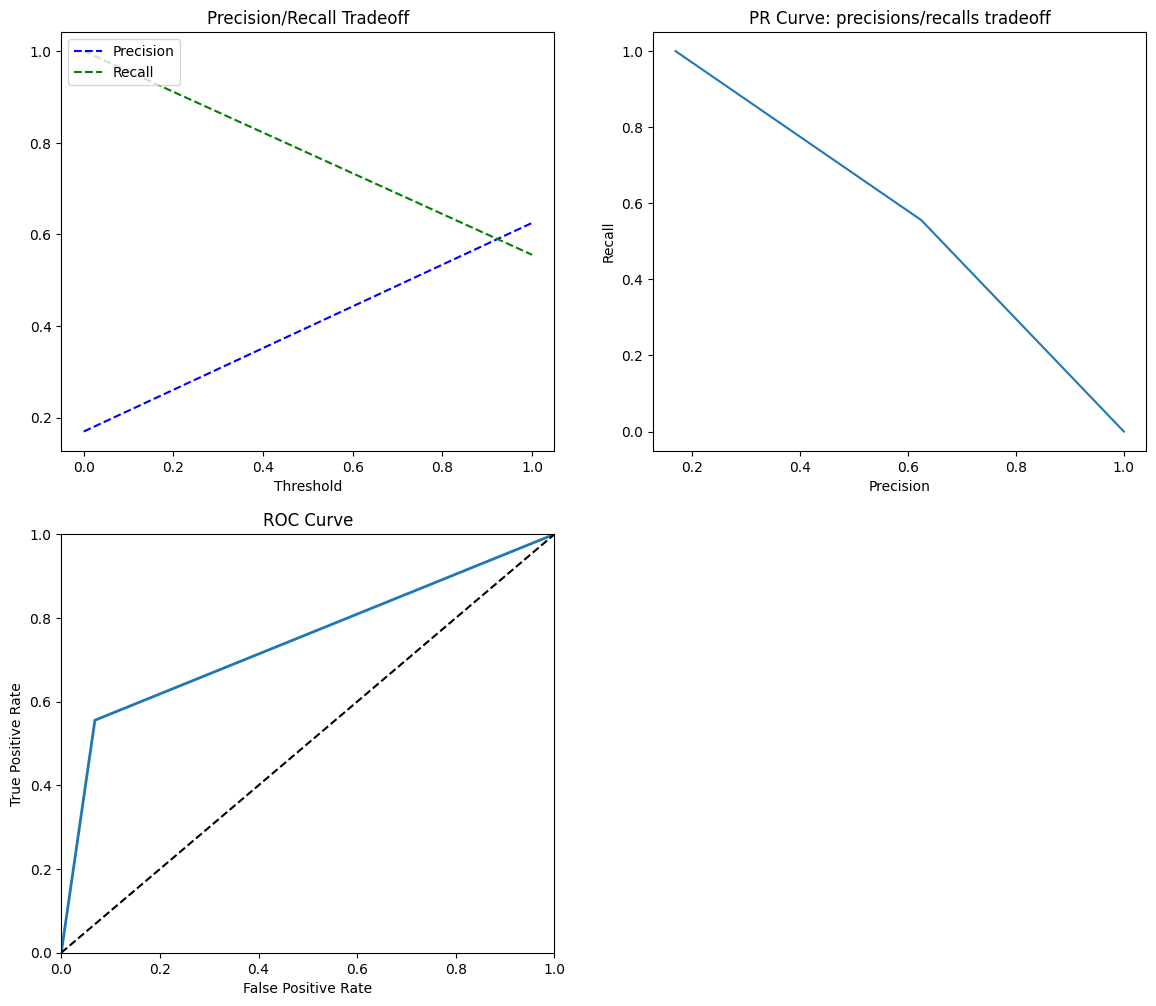

In [1150]:
from sklearn.metrics import precision_recall_curve, roc_curve
# Plot PR dan ROC Curves
precisions, recalls, thresholds = precision_recall_curve(y_val, model.predict(X_val))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.title("Precision/Recall Tradeoff")

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_val, model.predict(X_val))
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")


Dengan menggunakan model prediksi yang digunakan, diperoleh nilai confusion matrix sebagai berikut.

<Axes: >

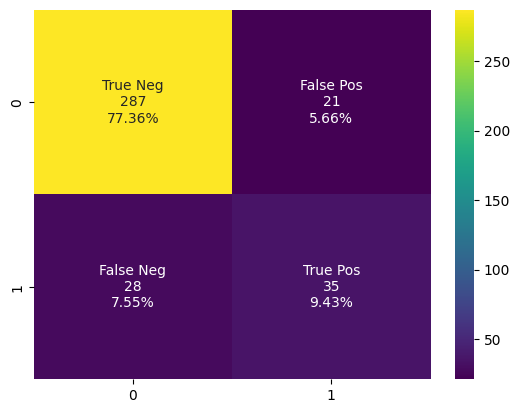

In [1151]:
# Confusion Matrix

CM = confusion_matrix(y_val,y_val_pred)
names = ["True Neg","False Pos","False Neg","True Pos"]
counts = [value for value in CM.flatten()]
percentages = ["{0:.2%}".format(value) for value in CM.flatten()/np.sum(CM)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM,annot = labels, cmap = "viridis", fmt ="")

## Menyimpan model

In [1152]:
filename = "model.sav"
joblib.dump(model, filename)

['model.sav']